## Importing the Necessary Libraries Needed Throught out

In [10]:
import operator

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


### Get The Input

In [24]:
n=int(input('Enter the number of points to be used: \n'))
d=int(input('Enter the Degree of poly to be used: \n'))
nn=float(input('Enter the % of data to be used for testing \n'))
nn=float(nn)/100

Enter the number of points to be used: 
200
Enter the Degree of poly to be used: 
4
Enter the % of data to be used for testing 
30


###  Creates a Demo funtion ( X * sin(x) ) it can be any thing else..


Try Playing With the Funtion and see Change in Results

In [25]:
def f(x):
    """ function to be approximated """
    return x * np.sin(x)
xtr = np.linspace(0, 10, 200)    
ytr=f(xtr)


x = np.linspace(0, 10, n)
y = f(x)

noise = np.random.normal(0, 1, y.shape)
y1=y+noise

### Transforming the data to include another axis

In [26]:
x = x[:, np.newaxis]
y1 = y1[:, np.newaxis]

## Splitting the dataset into the Training set and Test set

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y1, test_size =nn, random_state = 0)

### Create a d degree polynomial on input X_train and X_test 

In [28]:
polynomial_features= PolynomialFeatures(degree=d)
x_train_poly = polynomial_features.fit_transform(x_train)
x_test_poly = polynomial_features.fit_transform(x_test)

### Create and Fit the  Model 

In [29]:
model = LinearRegression()
model.fit(x_train_poly, y_train)
y_train_pred=model.predict(x_train_poly)
y_test_pred = model.predict(x_test_poly)

In [30]:
rmse = np.sqrt(mean_squared_error(y_train,y_train_pred))
rmset = np.sqrt(mean_squared_error(y_test,y_test_pred))
print('RMSE between actual and predicted values=',rmse)
print('RMSE between actual and predicted Test values=',rmset)

RMSE between actual and predicted values= 1.6089583259255726
RMSE between actual and predicted Test values= 1.5799144753663812


### Visualising the Training set results

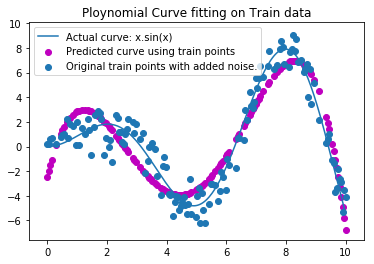

In [32]:
plt.figure()

plt.scatter(x_train, y_train_pred, color='m',label='Predicted curve using train points')
plt.scatter(x_train, y_train, label='Original train points with added noise.')
plt.plot(xtr,ytr,label='Actual curve: x.sin(x) ')
plt.legend()
plt.title('Ploynomial Curve fitting on Train data')
plt.show()

### Visualising the Test set results

Text(0.5, 1.0, 'Polynomial Curve fitting on Test data')

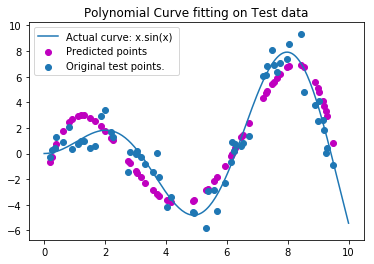

In [31]:
plt.figure()
plt.scatter(x_test, y_test_pred, color='m',label='Predicted points')
# plt.plot(x_test, y_test_pred, color='m',label='Predicted points')
plt.scatter(x_test, y_test, label='Original test points.')
plt.plot(xtr,ytr,label='Actual curve: x.sin(x) ')
plt.legend()
plt.title('Polynomial Curve fitting on Test data')